#Part 1: Regression on California Test Scores

##1. Find the url for the California Test Score Data Set from the following website:

In [18]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [19]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


###1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature. 

Text(0, 0.5, 'Count')

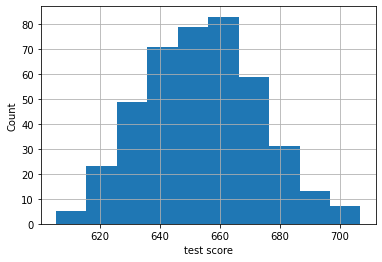

In [20]:
from matplotlib import pyplot as plt
df['testscr'].hist()
plt.xlabel('test score')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

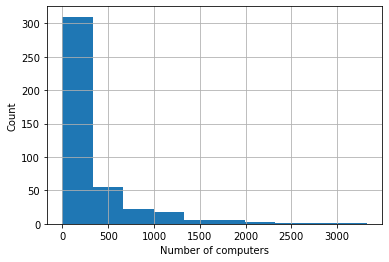

In [21]:
df['computer'].hist()
plt.xlabel('Number of computers')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

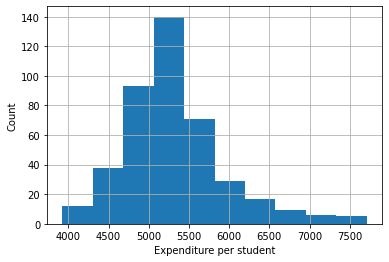

In [22]:
df['expnstu'].hist()
plt.xlabel('Expenditure per student')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

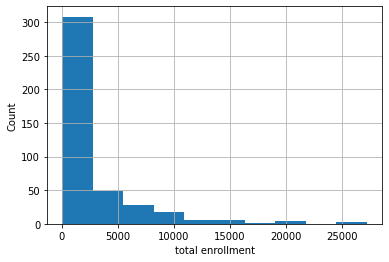

In [23]:
df['enrltot'].hist()
plt.xlabel('total enrollment')
plt.ylabel('Count')

### 1.2 Visualize the dependency of the target on each feature from 1.1

Text(0, 0.5, 'test score')

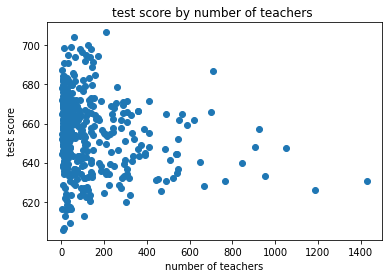

In [24]:
plt.scatter(df['teachers'], df['testscr'])
plt.title("test score by number of teachers ")
plt.xlabel("number of teachers")
plt.ylabel("test score")

Text(0, 0.5, 'test score')

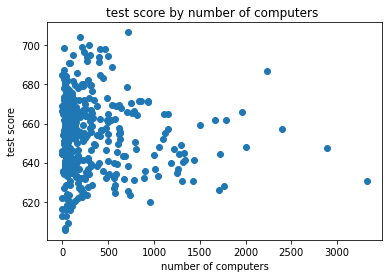

In [25]:
plt.scatter(df['computer'], df['testscr'])
plt.title("test score by number of computers ")
plt.xlabel("number of computers")
plt.ylabel("test score")

Text(0, 0.5, 'test score')

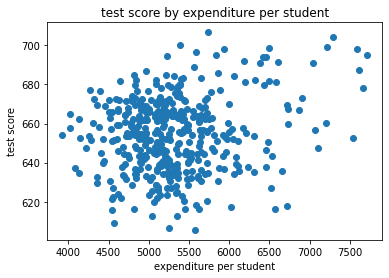

In [26]:
plt.scatter(df['expnstu'], df['testscr'])
plt.title("test score by expenditure per student")
plt.xlabel("expenditure per student")
plt.ylabel("test score")

Text(0, 0.5, 'test score')

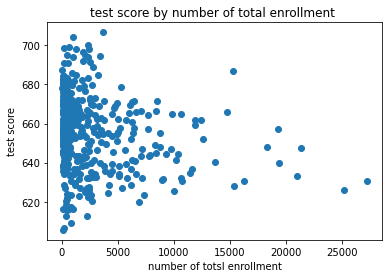

In [27]:
plt.scatter(df['enrltot'], df['testscr'])
plt.title("test score by number of total enrollment ")
plt.xlabel("number of totsl enrollment")
plt.ylabel("test score")

###1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [29]:
####get rid of the "readscr" and "mathscr"
data = df.iloc[:,5:-2]
data.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [30]:

y = data['testscr']
X = data.loc[:, data.columns != 'testscr']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [34]:
lasso = Lasso()
lasso.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.132e+01, tolerance: 1.014e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

In [35]:
#before Propocessing data#CV score
print("CV score for KNN: {:.3f}".format(np.mean(cross_val_score(KNeighborsRegressor(), X_train, y_train))))
print("CV score for Linear Regression: {:.3f}".format(np.mean(cross_val_score(LinearRegression(), X_train, y_train))))
print("CV score for Ridge: {:.3f}".format(np.mean(cross_val_score(Ridge(), X_train, y_train))))
print("CV score for Lasso: {:.3f}".format(np.mean(cross_val_score(Lasso(), X_train, y_train))))

CV score for KNN: -0.054
CV score for Linear Regression: 0.781
CV score for Ridge: 0.783
CV score for Lasso: 0.787


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.478e+01, tolerance: 7.976e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+03, tolerance: 7.888e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [36]:
#Proprocessing data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train_Scaler = scaler.transform(X_train) 
X_test_Scaler = scaler.transform(X_test)

In [38]:
print("CV score of KNN after transforming: {:.3f}".format(np.mean(cross_val_score(KNeighborsRegressor(), X_train_Scaler, y_train))))
print("CV score of Linear Regression after transforming: {:.3f}".format(np.mean(cross_val_score(LinearRegression(), X_train_Scaler, y_train))))
print("CV score of Ridge after transoforming: {:.3f}".format(np.mean(cross_val_score(Ridge(), X_train_Scaler, y_train))))
print("CV score of Lasso after transforming: {:.3f}".format(np.mean(cross_val_score(Lasso(), X_train_Scaler, y_train))))

CV score of KNN after transforming: 0.711
CV score of Linear Regression after transforming: 0.781
CV score of Ridge after transoforming: 0.783
CV score of Lasso after transforming: 0.784


###Does scaling the data with StandardScaler help?

####By comparing the cross validation scores, I found that the CV score of KNN increased from -0.054 to 0.711. However, for linear regression, ridge regression and lasso regression, the standard scalar seems to have no significant effect on CV score.



###1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
#KNN Regression
param_grid = {'n_neighbors': np.arange(1, 30, 1)}
gridknn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5)
gridknn.fit(X_train_Scaler, y_train)
print("best mean cross-validation score for KNN Regression: {:.3f}".format(gridknn.best_score_))

#Ridge Regression
alpha_Ridge = {'alpha': np.arange(1, 40, 1)}
gridridge = GridSearchCV(Ridge(),param_grid=alpha_Ridge, cv=5)
gridridge.fit(X_train_Scaler, y_train)
print("best mean cross-validation score for Ridge Regression: {:.3f}".format(gridridge.best_score_))

#Lasso Regression
alpha_Lasso = {'alpha': np.arange(0.1, 1, 0.01)}
gridlasso = GridSearchCV(Lasso(),param_grid=alpha_Lasso, cv=5)
gridlasso.fit(X_train_Scaler, y_train)
print("best mean cross-validation score for Lasso Regression: {:.3f}".format(gridlasso.best_score_))

best mean cross-validation score for KNN Regression: 0.721
best mean cross-validation score for Ridge Regression: 0.786
best mean cross-validation score for Lasso Regression: 0.788


By comparing the new cross validation score with the CV score in the previous question, I found that the CV score of KNN using gridsearch increased from 0.711 to 0.721. For ridge regression, the CV score increased from 0.783 to 0.786. For lasso regression, the CV score increased from 0.784 to 0.788.

###1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

 

In [41]:
#Compare Ridge and Lasso models
print("gridridge.best_params_: {}".format(gridridge.best_params_))
print("gridlasso.best_params_: {}".format(gridlasso.best_params_))

gridridge.best_params_: {'alpha': 17}
gridlasso.best_params_: {'alpha': 0.34999999999999987}


In [42]:
ridge17 = Ridge(alpha=17)
ridge17.fit(X_train_Scaler, y_train)

Ridge(alpha=17)

In [43]:
lasso35 = Lasso(alpha=0.35)
lasso35.fit(X_train_Scaler, y_train)

Lasso(alpha=0.35)

In [44]:
print("lasso.coef_: {}".format(lasso35.coef_))

lasso.coef_: [ -0.          -0.          -0.71843191 -10.14260823  -0.
   0.           0.90382116  -0.48522126   3.59450553  -3.12755529]


In [45]:
print("ridge.coef_: {}".format(ridge17.coef_))

ridge.coef_: [-0.28060442 -0.27472856 -1.86395554 -8.3434858   0.67162916 -0.00916238
  1.09073906 -0.64364196  3.99023121 -3.93390546]


####Based on the coefficients, Ridge and Lasso agree on that calwpct, mealpct, expnstu, str, avginc and elpct are all important.



###1.6 Discuss which final model you would choose to predict new data

Maybe Lasso since it is easier to write, and more accurate.

##Part 2: Classification on red and white wine characteristics



In [46]:
whitewine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=";")
redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=";")


In [47]:
whitewine['winetype']=0
redwine['winetype']=1

wine = pd.concat([whitewine,redwine])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


###2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   



Text(0, 0.5, 'Count')

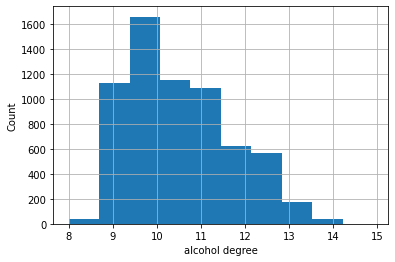

In [48]:
wine['alcohol'].hist()
plt.xlabel('alcohol degree')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

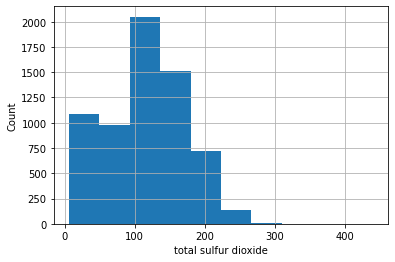

In [49]:
wine['total sulfur dioxide'].hist()
plt.xlabel('total sulfur dioxide')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

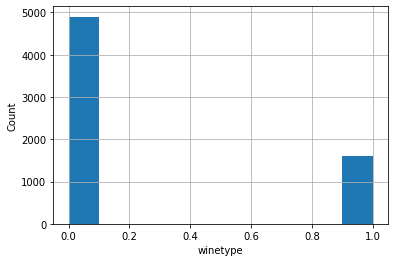

In [50]:
wine['winetype'].hist()
plt.xlabel('winetype')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

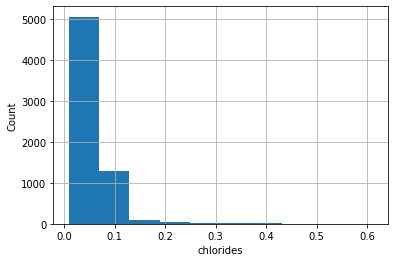

In [51]:
wine['chlorides'].hist()
plt.xlabel('chlorides')
plt.ylabel('Count')

###2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [52]:
y = wine['winetype']
X = wine.loc[:, wine.columns != 'winetype']

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [55]:
#KNN classification
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
#Logistic Regression without penalty
logreg = LogisticRegression(penalty='none', max_iter=100)
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(penalty='none')

In [57]:
#Logistic Regression with penalty
logreg_penalty = LogisticRegression(penalty='l2', max_iter=1000)
logreg_penalty.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [60]:
#CV Score
print("CV score for KNN: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train))))
print("CV score for logistic regression without penalty: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty='none', max_iter=100), X_train, y_train))))
print("CV score for logistic regression with penalty : {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty='12', max_iter=100), X_train, y_train))))


CV score for KNN: 0.942


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CV score for logistic regression without penalty: 0.980
CV score for logistic regression with penalty : nan


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [62]:
#Preprocessing data
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_Scaler = scaler.transform(X_train)
X_test_Scaler = scaler.transform(X_test)

In [63]:
#CV score after transforming
print("CV score of KNN after transforming: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train_Scaler, y_train))))
print("CV score of Logistic regression without penalty after transforming: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty = 'none',max_iter = 100), X_train_Scaler, y_train))))
print("CV score of Logistic regression with penalty after transforming: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty = '12',max_iter = 100), X_train_Scaler, y_train))))


CV score of KNN after transforming: 0.993
CV score of Logistic regression without penalty after transforming: 0.994
CV score of Logistic regression with penalty after transforming: nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    % (all_penalties, penalty)
ValueError: Lo

How different are the results? Does scaling the data with StandardScaler help?

By comparing the cross-validation scores, I find that CV score for KNN has increased from 0.942 to 0.993. For logistic regression without penalty, CV score has increased from 0.98 to 0.994, which is a small change.



###2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [64]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [65]:
#KNN GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train_Scaler, y_train)
print("best mean cross-validation score for KNN: {:.3f}".format(grid.best_score_))

best mean cross-validation score for KNN: 0.994


In [66]:
#Logistic Regression with penalty GridSearchCV
C_parameter = {'C': np.arange(1, 10, 1)}
gridlog = GridSearchCV(LogisticRegression(),param_grid=C_parameter)
gridlog.fit(X_train_Scaler, y_train)
print("best mean cross-validation score For log regression with penalty: {:.3f}".format(gridlog.best_score_))

best mean cross-validation score For log regression with penalty: 0.994


By on comparing the new cross-validation scores with CV scores in the last question, I find that CV score for KNN by using GridsearchCV has slightly increased from 0.993 to 0.994.



###2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [72]:
kfold = KFold(n_splits=5, shuffle = True, random_state = 42)
skfold = StratifiedKFold(n_splits=5, shuffle=True,random_state = 42)
from statistics import mean 

print("KFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold))))

print("StratifiedKFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold))))



KFold:
0.9371934923392828
StratifiedKFold:
0.9410928236718792


Change random seed of the shuffling

In [73]:
kfold = KFold(n_splits=5, shuffle = True, random_state = 5)
skfold = StratifiedKFold(n_splits=5, shuffle=True,random_state = 5)
print("KFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold))))

print("StratifiedKFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold))))


KFold:
0.9384259464013057
StratifiedKFold:
0.9392439319749382


change the random state of the split into training and test data

In [75]:
kfold = KFold(n_splits=5, shuffle = True, random_state = 10)
skfold = StratifiedKFold(n_splits=5, shuffle=True,random_state = 10)
print("KFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold))))

print("StratifiedKFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold))))


KFold:
0.9390396461854367
StratifiedKFold:
0.9406825672616227


Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

As shown on the results, we find that parameters change either by differenr random seed of the shuffling or by changing random state of the split into training and test data.



###2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_Scaler = scaler.transform(X_train)
X_test_Scaler = scaler.transform(X_test)

In [77]:
#Using Kfold
#logit with penalty
C_parameter = {'C': np.arange(0.1, 10, 0.1)}
gridlog = GridSearchCV(LogisticRegression(),param_grid=C_parameter, cv=kfold)
gridlog.fit(X_train_Scaler, y_train)
print("best parameter of logit with penalty: {}".format(gridlog.best_params_))

best parameter of logit with penalty: {'C': 1.6}


In [78]:
logitP = LogisticRegression(C = 1.6, max_iter=1000)
logitP.fit(X_train_Scaler,y_train)
print("logitP.coef_: {}".format(logitP.coef_))

logitP.coef_: [[ 0.19928016  1.26043253 -0.37792797 -3.97369457  0.78312015  1.05350092
  -3.01621296  3.96718118  0.19455511  0.59273821  1.43347107  0.16747769]]


In [79]:
#logit without penalty
logitNP = LogisticRegression(penalty='none', max_iter=1000)
logitNP.fit(X_train_Scaler,y_train)
print("logitNP.coef_: {}".format(logitNP.coef_))

logitNP.coef_: [[-0.39693258  1.15597261 -0.46486917 -5.60312291  0.75964249  1.43593388
  -3.33695551  5.75005978 -0.28843955  0.43795271  2.31703564  0.18676484]]


In [80]:
#Using SKfold
#logit with penalty
C_parameter = {'C': np.arange(0.1, 10, 0.1)}
gridlog = GridSearchCV(LogisticRegression(),param_grid=C_parameter, cv=skfold)
gridlog.fit(X_train_Scaler, y_train)
print("best parameter of logit with penalty: {}".format(gridlog.best_params_))

best parameter of logit with penalty: {'C': 3.0000000000000004}


In [81]:
logitP = LogisticRegression(C = 3.0, max_iter=1000)
logitP.fit(X_train_Scaler,y_train)
print("logitP.coef_: {}".format(logitP.coef_))

logitP.coef_: [[ 0.008736    1.22918506 -0.40299772 -4.50082191  0.772281    1.18784185
  -3.12231903  4.53369428  0.04016682  0.54172526  1.71208219  0.17245714]]


I would choose to predict logistic regression without penalty. The coefficients in this model seem to be more significant than those in the logistic model with penalty. The model will be more accurate. ¶